# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import datetime
import random
import torch
import numpy as np  
import datetime
from collections import deque
#plot
import matplotlib.pyplot as plt
%matplotlib inline


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name=".\Tennis_Windows_x86_64\Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        #print("\r States {} \t States-Concate:{} \tAction {}".format(states,states_c, actions))
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))
   
  

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.10000000149011612
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


In [48]:
# Deep Determinsitic Policy Gradient Algorithm
# Policy Based -Actor Critic Method
# Function used to train the multi agents for the given environments 
def trainMultiAgents(env,multiAgents,episodes_score,scores_window,avg_score,target_score=0.5,n_episodes=1000):
      
    for i_episode in range(1, n_episodes+1):
        #reset the unity Env_info for each new episode
        env_info = env.reset(train_mode=True)[brain_name]
        num_agents=len(env_info.agents) 
        #Scores got by each agent in current episode
        agent_scores=np.zeros(num_agents)          
               
        #set initial state
        states = env_info.vector_observations  #Current state 
        rewards = 0
        #multiAgents.resetNoise()
        
        #For each Episode,  take max steps and record the state and reward information until Episode complete   
        while True: # t in range(max_t):
            #Select action based on  policy based
            actions = multiAgents.act(states)
            actions = np.clip(actions, -1, 1)         #all actions between -1 and 1
            #print("\r Main Actions {}- 1:{} , 2:{}".format(actions,np.max(actions[0]), np.max(actions[1])))
            env_info = env.step(actions)[brain_name]  #Perform 'action'
            next_states = env_info.vector_observations #Next env state info 
            rewards = env_info.rewards                #reward +0.1 for every timestep
            dones   = env_info.local_done              #Is Episode complete
            agent_scores += rewards                   #Accumulate Rewards
            states = next_states                        #mark new state as current state
           
            #Save the Experience and Learn what should be the target actions to maximize rewards
            multiAgents.commonMemory.add(states,actions,rewards,next_states,dones)
            if(np.max(agent_scores)>=0.19): 
                replayHighMemoryRewards.add(states,actions,rewards,next_states,dones)
                if  BATCH_SIZE<=len(multiAgents.commonMemory):
                    multiAgents.learn()
                if  BATCH_SIZE<=len(multiAgents.commonMemory):
                    multiAgents.learn()
        
            
            if  BATCH_SIZE<=len(multiAgents.commonMemory):
                    multiAgents.learn()
        
            if np.any(dones):
                break
        #Experience 
        #multiAgents.commonMemory.add(states,actions,rewards,next_states,dones)
        #Learning through positive and negative rewards
        if  BATCH_SIZE<=len(multiAgents.commonMemory):
            multiAgents.learn()
        #Scores
        ep_score = np.max(agent_scores)
        episodes_score.append(ep_score)              #Max Score for each episode
        scores_window.append(ep_score)
        avg_score.append(np.mean(scores_window))     #Average Episode score
        
       
        #Episode scores
        if i_episode % 10 == 0 :#and ep_score >0.0:
            print('\rEpisode: {} Score: {}  AvgScore (100+): {} CurrentWindowMax: {} \n'.format(i_episode,ep_score,np.mean(scores_window),np.max(scores_window)))
        if i_episode % 100 == 0 :#and ep_score >0.0:
            print('\rEpisode :{} score : {} \t Avg Score(100+): {}  WinMax {} \n '.format(i_episode, ep_score,np.mean(scores_window),np.max(scores_window)))
            #print('\r Avg score {} \tMax score so far {} \n'.format(np.mean(avg_score),np.max(episodes_score) ))
            
        
        if np.mean(scores_window) > target_score: 
            print('\rMax Score achieved in episode {} : {} '.format(i_episode,np.mean(scores_window) ) )
            break
    
#Plot Episode score vs avg score
def showGraph(episodes_score,avg_score):
    target_score =0.5
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(episodes_score)), episodes_score)
    plt.plot(np.arange(len(avg_score)), avg_score)
    plt.xlabel('Episode number')
    plt.ylabel('Score')
    plt.show()
"Helps to zoom customized start and end scales to see the plot for specific set"
def zoomPlot(episodes_score,avg_score,zoom_dim,ptStart,ptEnd):
#Zoom above plots to custom range 10K
    target_score =0.5
    if(zoom_dim==(ptEnd-ptStart)):
        zoom_dim = zoom_dim
        zoom_start_point = ptStart
        zoom_end_point = ptEnd
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cus_score=episodes_score[zoom_start_point:zoom_end_point]

        #plt.plot(np.arange(len(scores_window)), scores_window)
        plt.plot(np.arange(zoom_dim), cus_score)
        plt.plot(np.arange(zoom_dim), avg_score[zoom_start_point:zoom_end_point])
        plt.xlabel('Episode number')
        plt.ylabel('Score')

        plt.show()
    else:
        print('scaling not match with start and end point with array dimension')

"Save both trained local and target model weights -Multi agentto Agent "
def save_model_weightsv1(colabAI):
    #Save weights
    [torch.save(actor.state_dict(), 'Checkpoint_actor{}_local.pth'.format(i))for i, actor in enumerate(colabAI.get_actors())]
    [torch.save(critic.state_dict(), 'Checkpoint_critic{}_local.pth'.format(i))for i, critic in enumerate(colabAI.get_critics())]    

"Save both trained local and target model weights -common Actor Network for both agent"
def save_model_weights(colabAI):
    #Save weights
    for agent in colabAI.multiagent:
        torch.save(agent.actor_local.state_dict(),'checkpoint_actor_point_base.pth')
        torch.save(agent.critic_local.state_dict(),'checkpoint_critic_point_base.pth')
        torch.save(agent.actor_target.state_dict(),'checkpoint_actor_target_base.pth')
        torch.save(agent.critic_target.state_dict(),'checkpoint_critic_target_base.pth')
       
            

In [49]:
import json
config = json.load(open('HyperParamsConfig.json'))

SEEDC = config["SEEDC"]
SEED = config["SEED"]
#Replay Memory config
BUFFER_SIZE = config["BUFFER_SIZE"]
BATCH_SIZE = config["BATCH_SIZE"]
# Hyperparameters
GAMMA = config['GAMMA']            # discount factor
TAU = config['TAU']              # for soft update of target parameters
LR_ACTOR = config['LR_ACTOR']        # learning rate of the actor 
LR_CRITIC = config['LR_CRITIC']        # learning rate of the critic
MU= config["MU"]
THETA = config["THETA"]
SIGMA = config["SIGMA"]
EXPLORE = config["EXPLORE"]



In [50]:
#DeepDeterminsticPolicyGradient -Multi Agent -DDPG
from nn_model import Actor , Critic
from DDPGMultiAgentTennis import DDPGMultiAgent
from agent import ReplayBuffer

#Random Seed-set the seed of the random number generator to a fixed value to get 
#Reproducable results
np.random.seed(SEEDC)
torch.manual_seed(SEEDC) 



In [9]:
#common Replay Memory for both Agents
replayMemory =  ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE,num_agents, SEED)
#common Replay Memory store high rewards
replayHighMemoryRewards =  ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE,num_agents, SEED)



In [51]:
colabAI = DDPGMultiAgent(state_size,action_size,replayMemory,num_agents,config)


OUNoise params - Mu:[0. 0.] , theta:0.193 sigma:0.29 
Agent's HP :Seed 1,Gamma :0.998789, LR_Act :1e-07 , LR_Critic 2.5e-06 , Mu 0, Theta 0.193, Sigma 0.29,TAU:0.0013, ExploreFactor 0.5024, IsTargetHardcopyTrue
OUNoise params - Mu:[0. 0.] , theta:0.193 sigma:0.29 
Agent's HP :Seed 1,Gamma :0.998789, LR_Act :1e-07 , LR_Critic 2.5e-06 , Mu 0, Theta 0.193, Sigma 0.29,TAU:0.0013, ExploreFactor 0.5024, IsTargetHardcopyTrue
OUNoise params - Mu:[0. 0.] , theta:0.193 sigma:0.29 
HP :Gamma :0.998789 , TAU:0.0013, LR_Act :1e-07 , LR_Critic 2.5e-06 , Mu 0, Theta 0.193, Sigma 0.29, ExploreFactor 0.5024, IsTargetHardcopyFalse


In [11]:
#Load trained model weights where got 0.5 in 1800 episodes itself

actornnk_path ="./avgp91/checkpoint_actor_point_base-Copy10.pth"
criticnn_path ="./avgp91/checkpoint_critic_point_base-Copy10.pth"
act_tar_path = "./avgp91/checkpoint_actor_target_base-Copy10.pth"
critc_tar_path="./avgp91/checkpoint_critic_target_base-Copy10.pth"
colabAI.load_trained_model(actornnk_path,criticnn_path,act_tar_path,critc_tar_path)



Loading trained models from ./avgp91/checkpoint_actor_point_base-Copy10.pth and ./avgp91/checkpoint_critic_point_base-Copy10.pth
Done!


In [33]:
#Load trained model weights where got 0.5 in 1800 episodes itself

actornnk_path ="./Max1_7/checkpoint_actor_point_base1p7.pth"
criticnn_path ="./Max1_7/checkpoint_critic_point_base1p7.pth"
act_tar_path = "./Max1_7/checkpoint_actor_target_base1p7.pth"
critc_tar_path="./Max1_7/checkpoint_critic_target_base1p7.pth"
colabAI.load_trained_model(actornnk_path,criticnn_path,act_tar_path,critc_tar_path)

actornnk_path ="./Max2p8/checkpoint_actor_point_base2p8.pth"
criticnn_path ="./Max2p8/checkpoint_critic_point_base2p8.pth"
act_tar_path = "./Max2p8/checkpoint_actor_target_base2p8.pth"
critc_tar_path="./Max2p8/checkpoint_critic_target_base2p8.pth"
colabAI.load_trained_model(actornnk_path,criticnn_path,act_tar_path,critc_tar_path)



Loading trained models from ./Max1_7/checkpoint_actor_point_base1p7.pth and ./Max1_7/checkpoint_critic_point_base1p7.pth
Done!
Loading trained models from ./Max2p8/checkpoint_actor_point_base2p8.pth and ./Max2p8/checkpoint_critic_point_base2p8.pth
Done!


In [52]:
#NN Model updated
actornnk_path =".\winavgp95\checkpoint_actor_point_base.pth"
criticnn_path =".\winavgp95\checkpoint_critic_point_base.pth"
act_tar_path = ".\winavgp95\checkpoint_actor_target_base.pth"
critc_tar_path=".\winavgp95\checkpoint_critic_target_base.pth"
colabAI.load_trained_model(actornnk_path,criticnn_path,act_tar_path,critc_tar_path)


Loading trained models from .\winavgp95\checkpoint_actor_point_base.pth and .\winavgp95\checkpoint_critic_point_base.pth
Done!


In [53]:
#counters
agent_scores=np.zeros(num_agents)          # 
episodes_score = []                         #Score counter to store each Episode score
scores_window = deque(maxlen=100)          #Window for every 100 episodes scores to get the Target Avg score
avg_score =[]
states=0

In [54]:
#tune 2 after 5k episodes
for agent in colabAI.multiagent:
    print("Gamma:{} , exploreFactor:{},LrAct :{},LrCritic:{},Tau:{},Sigma:{},Theta:{}".format(getattr(agent,"gamma"),getattr(agent,"explorfactor"),getattr(agent,"lrActor"),getattr(agent,"lrCritic"),getattr(agent,"tau"),getattr(agent,"sigma"),getattr(agent,"theta")))  

Gamma:0.998789 , exploreFactor:0.5024,LrAct :1e-07,LrCritic:2.5e-06,Tau:0.0013,Sigma:0.29,Theta:0.193
Gamma:0.998789 , exploreFactor:0.5024,LrAct :1e-07,LrCritic:2.5e-06,Tau:0.0013,Sigma:0.29,Theta:0.193


In [55]:
#Training Tennis Agents
#Gamma:0.998789 , exploreFactor:0.5024,LrAct :1e-07,LrCritic:2.5e-06,Tau:0.0013,Sigma:0.29,Theta:0.193
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=1000)
save_model_weights(colabAI)


Episode: 10 Score: 0.0  AvgScore (100+): 0.010000000149011612 CurrentWindowMax: 0.10000000149011612 

Episode: 20 Score: 0.0  AvgScore (100+): 0.030000000447034835 CurrentWindowMax: 0.10000000149011612 

Episode: 30 Score: 0.10000000149011612  AvgScore (100+): 0.03666666721304258 CurrentWindowMax: 0.10000000149011612 

Episode: 40 Score: 0.10000000149011612  AvgScore (100+): 0.04000000059604645 CurrentWindowMax: 0.10000000149011612 

Episode: 50 Score: 0.0  AvgScore (100+): 0.03800000056624413 CurrentWindowMax: 0.10000000149011612 

Episode: 60 Score: 0.0  AvgScore (100+): 0.03833333390454451 CurrentWindowMax: 0.10000000149011612 

Episode: 70 Score: 0.10000000149011612  AvgScore (100+): 0.04000000059604645 CurrentWindowMax: 0.10000000149011612 

Episode: 80 Score: 0.0  AvgScore (100+): 0.04000000059604645 CurrentWindowMax: 0.10000000149011612 

Episode: 90 Score: 0.0  AvgScore (100+): 0.03888888946837849 CurrentWindowMax: 0.10000000149011612 

Episode: 100 Score: 0.0  AvgScore (100+):

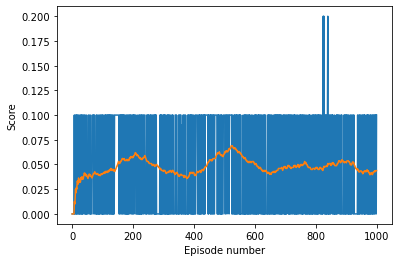

In [56]:

showGraph(episodes_score,avg_score)

In [64]:
for agent in colabAI.multiagent:
    setattr(agent,"lrActor",0.0005)
    setattr(agent,"lrCritic",0.001)
    setattr(agent,"tau",0.0012)
    setattr(agent,"explorfactor",0.13)


In [57]:
#Training Tennis Agents
#Gamma:0.998789 , exploreFactor:0.03669,LrAct :1.5e-09,LrCritic:2e-08,Tau:0.0012,Sigma:0.29,Theta:0.193
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=1000)
save_model_weights(colabAI)


KeyboardInterrupt: 

In [ ]:
showGraph(episodes_score,avg_score)

In [ ]:
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=1000)
save_model_weights(colabAI)
showGraph(episodes_score,avg_score)

In [ ]:
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=1000)
save_model_weights(colabAI)
showGraph(episodes_score,avg_score)

rentWindowMax: 0.0 

Episode: 7800 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode :7800 score : 0.0 	 Avg Score(100+): 0.0  WinMax 0.0 
 
Episode: 7810 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 7820 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 7830 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 7840 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 7850 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 7860 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 7870 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 7880 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 7890 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 7900 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode :7900 score : 0.0 	 Avg Score(100+): 0.0  WinMax 0.0 
 
Episode: 7910 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 


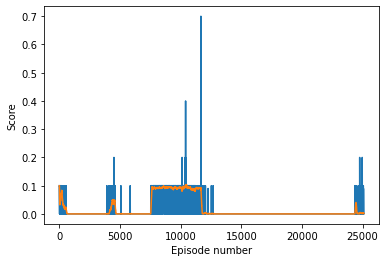

In [46]:
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=10000)
save_model_weights(colabAI)
showGraph(episodes_score,avg_score)

pisode: 2480 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 2490 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 2500 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode :2500 score : 0.0 	 Avg Score(100+): 0.0  WinMax 0.0 
 
Episode: 2510 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 2520 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 2530 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 2540 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 2550 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 2560 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 2570 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 2580 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 2590 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 2600 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode :2600 

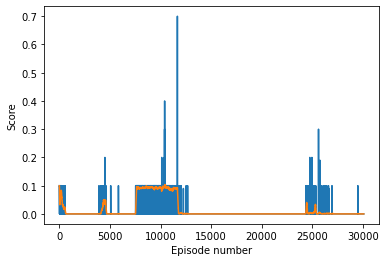

In [47]:
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=5000)
save_model_weights(colabAI)
showGraph(episodes_score,avg_score)

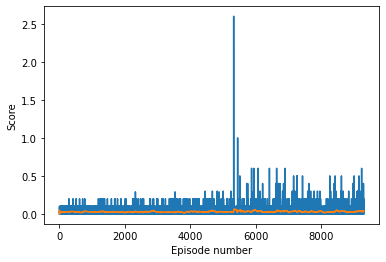

In [35]:
#LrAct:0000000015 LrCrt:00000002 sigma:0.24
#Explore 1.0
#Gamma:0.99896 , exploreFactor:0.0032,LrAct :7.5e-08,LrCritic:2e-07,Tau:0.0013,Sigma:0.279,Theta:0.19
#started 1.05 pm IST 30th Aug- Learn every step after 5k run where got max 0.3 rewards
showGraph(episodes_score,avg_score)
#zoomPlot(episodes_score,avg_score,100,8200,8300)

In [27]:
for agent in colabAI.multiagent:
    #setattr(agent,"explorfactor",0.0032)
    setattr(agent,"sigma",0.24)
    setattr(agent,"lrActor", 0.0000000015)
    setattr(agent,"lrCritic",0.00000002)

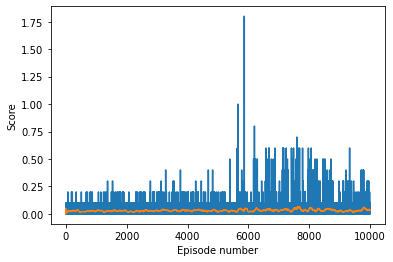

In [20]:
#Gamma:0.99896 , exploreFactor:0.00327,LrAct :7.5e-08,LrCritic:2e-07,Tau:0.00013,Sigma:0.279,Theta:0.19
showGraph(episodes_score,avg_score)

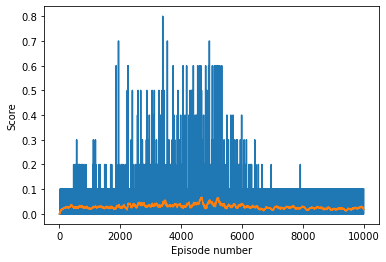

In [19]:

#Gamma:0.99896 , exploreFactor:0.00327,LrAct :7.5e-08,LrCritic:2e-07,Tau:0.00013,Sigma:0.279,Theta:0.19
showGraph(episodes_score,avg_score)

In [ ]:
showGraph(episodes_score,avg_score)

In [26]:
replayMemory_bkup16k=replayMemory
print ("Local Memory {}, BackupMemory {} , Highreward {}".format(len(replayMemory),len(replayMemory_bkup16k),len(replayHighMemoryRewards)))



Local Memory 229698, BackupMemory 229698 , Highreward 104297


In [27]:
replayHighMemoryRewards_bkup_point175=replayHighMemoryRewards

In [28]:
setattr(colabAI,"commonMemory",replayHighMemoryRewards)
print("Refreshed memory length",len(colabAI.commonMemory))

Refreshed memory length 104297


In [24]:
#Training Tennis Agents
#Memory refreshed
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=5000)
save_model_weights(colabAI)


0000000149011612 
 
Episode: 3310 Score: 0.10000000149011612  AvgScore (100+): 0.018600000292062758 CurrentWindowMax: 0.10000000149011612 

Episode: 3320 Score: 0.0  AvgScore (100+): 0.015800000242888926 CurrentWindowMax: 0.10000000149011612 

Episode: 3330 Score: 0.0  AvgScore (100+): 0.019700000304728748 CurrentWindowMax: 0.10000000149011612 

Episode: 3340 Score: 0.10000000149011612  AvgScore (100+): 0.021600000336766245 CurrentWindowMax: 0.10000000149011612 

Episode: 3350 Score: 0.0  AvgScore (100+): 0.023600000366568567 CurrentWindowMax: 0.10000000149011612 

Episode: 3360 Score: 0.10000000149011612  AvgScore (100+): 0.025400000400841238 CurrentWindowMax: 0.10000000149011612 

Episode: 3370 Score: 0.0  AvgScore (100+): 0.0264000004157424 CurrentWindowMax: 0.10000000149011612 

Episode: 3380 Score: 0.0  AvgScore (100+): 0.02840000044554472 CurrentWindowMax: 0.10000000149011612 

Episode: 3390 Score: 0.0  AvgScore (100+): 0.029300000462681056 CurrentWindowMax: 0.10000000149011612 


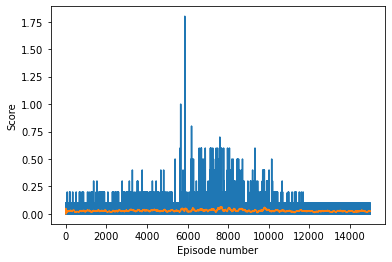

In [25]:
#Gamma:0.99896 , exploreFactor:0.00327,LrAct :7.5e-08,LrCritic:2e-07,Tau:0.00013,Sigma:0.279,Theta:0.19
showGraph(episodes_score,avg_score)


In [47]:
#Learning at (np.any(done)) during train
#High rewards memory condition updated from 0.19 to 0.39 
#Training Tennis Agents
#Memory refreshed
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=5000)
save_model_weights(colabAI)


Episode: 10 Score: 0.0  AvgScore (100+): 0.0009000000171363354 CurrentWindowMax: 0.09000000171363354 

Episode: 20 Score: 0.0  AvgScore (100+): 0.0009000000171363354 CurrentWindowMax: 0.09000000171363354 

Episode: 30 Score: 0.0  AvgScore (100+): 0.0009000000171363354 CurrentWindowMax: 0.09000000171363354 

Episode: 40 Score: 0.0  AvgScore (100+): 0.0009000000171363354 CurrentWindowMax: 0.09000000171363354 

Episode: 50 Score: 0.0  AvgScore (100+): 0.0009000000171363354 CurrentWindowMax: 0.09000000171363354 

Episode: 60 Score: 0.0  AvgScore (100+): 0.0009000000171363354 CurrentWindowMax: 0.09000000171363354 

Episode: 70 Score: 0.0  AvgScore (100+): 0.0009000000171363354 CurrentWindowMax: 0.09000000171363354 

Episode: 80 Score: 0.0  AvgScore (100+): 0.0009000000171363354 CurrentWindowMax: 0.09000000171363354 

Episode: 90 Score: 0.0  AvgScore (100+): 0.0009000000171363354 CurrentWindowMax: 0.09000000171363354 

Episode: 100 Score: 0.0  AvgScore (100+): 0.0009000000171363354 CurrentWi

KeyboardInterrupt: 

In [ ]:
#Gamma:0.9986 , exploreFactor:0.003,LrAct :5.5e-05,LrCritic:3e-05,Tau:0.0013,Sigma:0.369,Theta:0.39
#Memory refereshed 
#Learning at every step
#Highreward experience saved condigtion updated from 0.19 to 0.39 - Train Function
showGraph(episodes_score,avg_score)

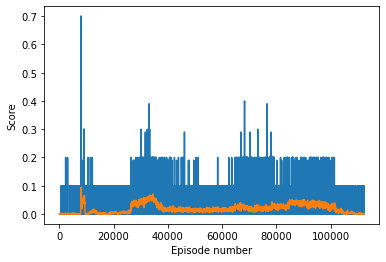

In [80]:
#HP :
#[8] just 0.1 so reset to default [1]
#[7] Reset to [5]
#[6] setattr(colabAI,"explorfactor",0.39) setattr(colabAI,"lrActor",0.0001)setattr(colabAI,"lrCritic",0.0001)
#[5] setattr(colabAI,"explorfactor",0.09) setattr(colabAI,"lrActor",0.000117)setattr(colabAI,"lrCritic",0.000117)
#[4] Gamma : 99782011
# [3] Gamma :9782011
# [2]setattr(colabAI,"explorfactor",1.0)(colabAI,"sigma",0.24)setattr(colabAI,"lrActor",0.0001)setattr(colabAI,"lrCritic",0.0001)
# [1]Seed 1,Gamma :0.997999 , TAU:0.0013, LR_Act :0.00013 , LR_Critic 0.0001 , Mu 0.0, Theta 0.17, Sigma 0.6, ExploreFactor 0.95, IsTargetHardcopyFalse
#Memory refreshed
showGraph(episodes_score,avg_score)

In [ ]:
episodes_score5=episodes_score

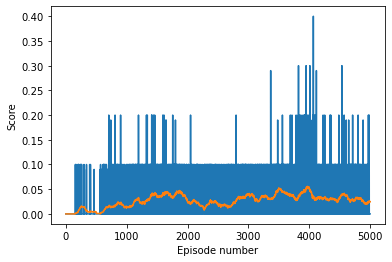

In [18]:
#Hyper param -Gamma :0.768 , LR_Act :0.0001 , LR_Critic 0.0002 , Theta 0.17, Sigma 0.24
#2nd run without restart kernal but 3K Episodes
showGraph(episodes_score,avg_score)

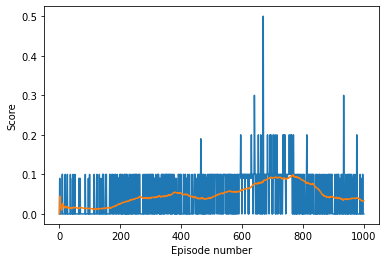

In [13]:
#Hyper param - Gamma :0.987 , LR_Act :0.0001 , LR_Critic 0.0002 , Theta 0.17, Sigma 0.24
#2nd run without restart kernal
showGraph(episodes_score,avg_score)

In [23]:
#Save weights
print('\rMax Score achieved in all episodes {} : {} '.format(i_episode,np.max(episodes_score) ) )
torch.save(colabAI.actor_local.state_dict(), 'checkpoint_actor_point_base7.pth')
torch.save(colabAI.critic_local.state_dict(), 'checkpoint_critic_point_base7.pth')
torch.save(colabAI.actor_target.state_dict(), 'checkpoint_actor_target_base7.pth')        
torch.save(colabAI.critic_target.state_dict(), 'checkpoint_critic_target_base7.pth')

Max Score achieved in all episodes 10000 : 0.7000000104308128 


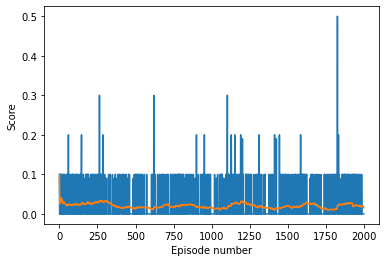

In [24]:
#Zoom above plots to custom range
target_score =0.5
fig = plt.figure()
ax = fig.add_subplot(111)
cus_score=episodes_score[0:2000]
plt.plot(np.arange(2000), cus_score)
plt.plot(np.arange(2000), avg_score[0:2000])
plt.xlabel('Episode number')
plt.ylabel('Score')

plt.show()

In [44]:
env.close()

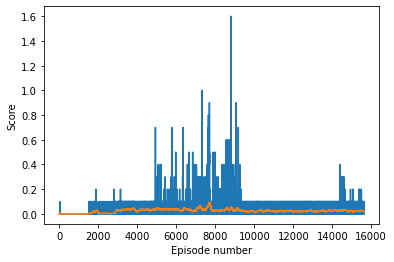

In [33]:
target_score =0.5
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(episodes_score)), episodes_score)
plt.plot(np.arange(len(avg_score)), avg_score)
plt.plot(np.arange(len(scores)), target_score*np.ones(len(scores)))
plt.xlabel('Episode number')
plt.ylabel('Score')
#plt.savefig('graph_trained_{:d}_episodes'.format(len(scores)), format='png')
plt.show()

In [17]:
#reference from 
import pandas as pd

#episodes_score,scores_window,avg_score
scoresdeq = list(scores_window)

scores_df = pd.DataFrame(episodes_score)
scores_deq_df = pd.DataFrame(scoresdeq)
avg_scores_df = pd.DataFrame(avg_score)


scores_df.to_csv('scores_df.csv', index=False, header=True)
scores_deq_df.to_csv('scores_deq_df.csv', index=False, header=True)
avg_scores_df.to_csv('avg_scores_df.csv', index=False, header=True)

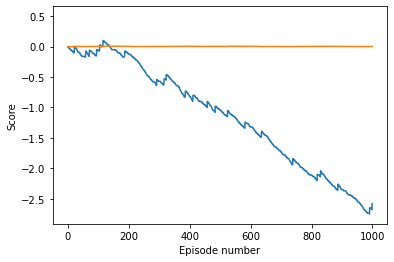

In [62]:
target_score =0.5
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(rewards_plot)), rewards_plot)
plt.plot(np.arange(len(avg_score)), avg_score)
plt.plot(np.arange(len(scores)), target_score*np.ones(len(scores)))
plt.xlabel('Episode number')
plt.ylabel('Score')
#plt.savefig('graph_trained_{:d}_episodes'.format(len(scores)), format='png')
plt.show()